In [1]:
import tensorflow as tf
from tensorflow import  keras
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/neural-nets/master/examples/quadratic/data/train.csv")
train_df.head()

,x,y,color
0,-4.956506,25.706334,0.0
1,2.897218,10.359784,0.0
2,-4.488273,22.113311,0.0
3,3.823152,15.665060,0.0
4,4.425201,21.118726,0.0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       4000 non-null   float64
 1   y       4000 non-null   float64
 2   color   4000 non-null   float64
dtypes: float64(3)
memory usage: 93.9 KB


In [4]:
train_df["color"].unique()

array([0., 1.])

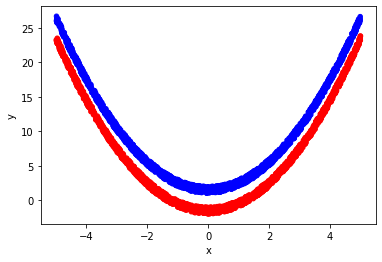

In [5]:
color = train_df["color"].map({0:"b",1:"r"})
train_df.plot(kind="scatter",x="x",y="y",c=color)

In [16]:
np.random.shuffle(train_df.values)
train_df.head()

,x,y,color
0,3.280108,12.045808,0.0
1,-4.559395,19.520139,1.0
2,4.656147,20.542137,1.0
3,-2.323608,7.010146,0.0
4,4.463297,21.017139,0.0


In [17]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(14,activation="relu"),
    keras.layers.Dense(14,activation="relu"),
    keras.layers.Dense(2,activation="softmax")   
])

model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.fit(train_df[["x","y"]].values,train_df["color"].values,batch_size=4,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.7415
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3600 - accuracy: 0.8760
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2263 - accuracy: 0.9470
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1483 - accuracy: 0.9743
Epoch 5/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1053 - accuracy: 0.9868
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0810 - accuracy: 0.9877
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0607 - accuracy: 0.9920
Epoch 8/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0491 - accuracy: 0.9940
Epoch 9/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0399 - accuracy: 0.9967
Epoch 10/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0321 - accurac

In [18]:
test_df = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/neural-nets/master/examples/quadratic/data/test.csv")
test_df.head()

,x,y,color
0,-0.709694,1.902953,0.0
1,1.358063,2.923887,0.0
2,-0.684174,2.125850,0.0
3,3.190384,11.425374,0.0
4,-1.225524,3.178416,0.0


In [19]:
model.evaluate(test_df[["x","y"]].values,test_df["color"])

32/32 [==============================] - 0s 946us/step - loss: 0.0249 - accuracy: 0.9920


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[0.024851704016327858, 0.9919999837875366]